A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [1]:
import numpy as np 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [4]:
import matplotlib.pyplot as plt

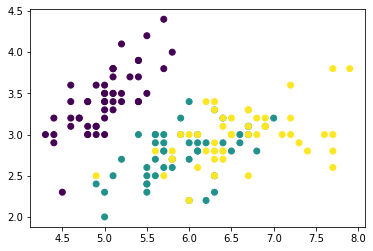

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)


## EJERCICIO 1: PCA Y K MEANS

In [6]:
from sklearn.decomposition import PCA

### Dos dimensiones 

In [7]:
pca = PCA(n_components=2)

In [8]:
import pandas as pd
X_pca_2 = pca.fit_transform(iris.data)
pd.DataFrame(X_pca_2)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [9]:
pca.explained_variance_ratio_ 
# Hemos mantenido un 92% de la infromación, 

array([0.92461872, 0.05306648])

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca_2)

predict = kmeans.predict(X_pca_2)

In [12]:
kmeans.cluster_centers_

array([[ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ]])

In [13]:
kmeans.inertia_

63.81994202200121

In [14]:
kmeans.score(X_pca_2)

-63.819942022001214

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
print(predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [18]:
mean_squared_error(y, predict)

1.6266666666666667

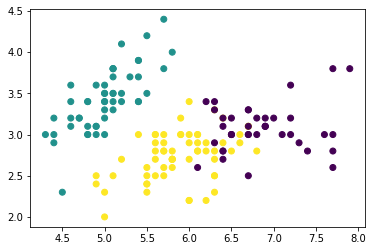

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=predict)

### Tres dimensiones 

In [20]:
pca1 = PCA(n_components=3)

In [21]:
X_pca_3 = pca1.fit_transform(X)
pd.DataFrame(X_pca_3)

,0,1,2
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [22]:
pca1.explained_variance_ratio_ 

array([0.92461872, 0.05306648, 0.01710261])

In [23]:
kmeans1 = KMeans(n_clusters=3, random_state=42).fit(X_pca_3)

predict1 = kmeans1.predict(X_pca_3)

In [24]:
kmeans1.inertia_

75.31893784137078

In [25]:
kmeans1.score(X_pca_3)

-75.3189378413708

In [26]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
print(predict1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


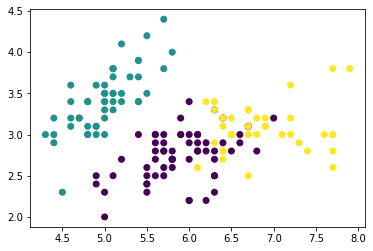

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=predict1)

In [29]:
mean_squared_error(y, predict1)

1.04

In [56]:
k_pca2_score = accuracy_score(y, predict)
k_pca3_score = accuracy_score(y, predict1)

print(f'PCA2_Score: {k_pca2_score.round(2)}')
print(f'PCA3_Score: {k_pca3_score}')

PCA2_Score: 0.09
PCA3_Score: 0.24


Es mejor el de 2 dimensiones ya que tiene una inercia menor, aunque sin embargo si lo comparamos con las variables reales de y, tiene mayor acierto el de 3 dimensiones.

## EJERCICIO 2: TSNE Y DBSCAN

### Dos dimensiones 

In [45]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [46]:
X_embedded_2 = TSNE(n_components=2).fit_transform(X)

In [47]:
pd.DataFrame(X_embedded_2)

,0,1
0,-12.999036,21.139944
1,-13.627328,18.368683
2,-12.477587,18.746294
3,-12.778340,18.216446
4,-12.664607,21.231590
...,...,...
145,4.018939,-16.197788
146,3.030485,-12.979565
147,3.738084,-15.248627
148,2.138884,-16.691662


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X_scan_2 = StandardScaler().fit_transform(X_embedded_2)
db = DBSCAN(eps=0.5, min_samples=5).fit(X_scan_2)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels2 = db.labels_
labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Tres dimensiones 

In [51]:
X_embedded_3 = TSNE(n_components=3).fit_transform(X)

In [52]:
X_scan_3 = StandardScaler().fit_transform(X_embedded_3)
db1 = DBSCAN(eps=0.2, min_samples=2).fit(X_scan_3)
core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
labels3 = db1.labels_
labels3

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
db2_score = accuracy_score(y, labels2)
db3_score = accuracy_score(y, labels3)

print('TSNE2_Score:', db2_score.round(2))
print('TSNE3_Score:', db3_score)

TSNE2_Score: 0.67
TSNE3_Score: 0.0


Dbscan no es buen método ya que no distingue bien las clases ya que no es una concentración clara de puntos. 